In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.animation as animation
%matplotlib inline
sns.set(font_scale=1.4)

In [2]:
data= pd.read_csv('../input/covid19india/data.csv')
data[data['id'] == data['unique_id']].shape

(664, 17)

In [3]:
entities = ['schools & other educational organization shutdown','public places shutdown',
            'work from home started for employees','country under lockdown','current situation']
dates = ['2020-03-10','2020-03-13','2020-03-16','2020-03-21','2020-03-26']

In [4]:
data = data.sort_values(by="diagnosed_date")

In [5]:
mask1 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-09') # before school lockdown
mask1 = len(data.loc[mask1])
mask2 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-12') #before public place shutdown
mask2 = len(data.loc[mask2])
mask3 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-15') # beforw wfh
mask3 = len(data.loc[mask3])
mask4 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-21') # beforw lookdown
mask4 = len(data.loc[mask4])
mask5 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-26') # beforw lookdown
mask5 = len(data.loc[mask5])

In [6]:
case_counts = [mask1, mask2,mask3,mask4,mask5]

In [7]:
plot_data = pd.DataFrame({'dates':dates,'counts':case_counts,'entities': entities})

In [8]:
plot_data

,dates,counts,entities
0,2020-03-10,47,schools & other educational organization shutdown
1,2020-03-13,81,public places shutdown
2,2020-03-16,112,work from home started for employees
3,2020-03-21,333,country under lockdown
4,2020-03-26,663,current situation


In [9]:
plot_data['dates'] = pd.to_datetime(plot_data['dates'])

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


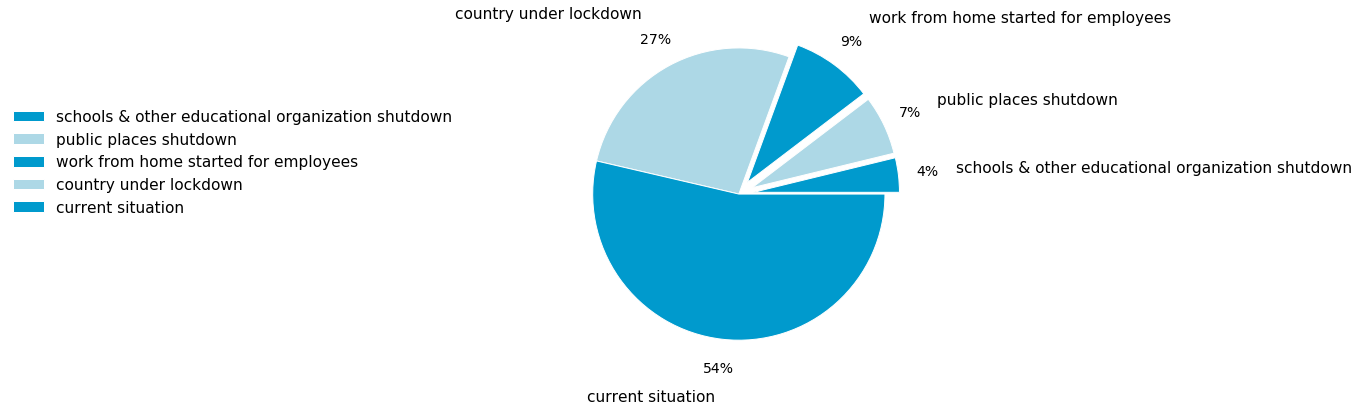

In [10]:
fig, ax = plt.subplots(figsize = (10,6))
labels = entities
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
percentages = case_counts
explode=(0.1,0.1,0.1,0,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.legend(frameon=False, bbox_to_anchor=(0.0,0.8))

> **Note: This work is highly inspired from few other kaggle kernels , github sources and other data science resources. Any traces of replications, which may appear , is purely co-incidental. Due respect & credit to all my fellow kagglers.**